## Run Policies

In [1]:
from policies import run_experiment

policies = [1, 2, 3]
exp_num = [1, 2, 3, 4]
run_time = 100_000

queue_logs = []

# NOTE: run_experiment returns queue_lengths_over_time, profit_per_customer, frac_over_30s, avg_queue_len

# Run experiments for policies
for i in range(len(policies)): 
    pol_results = []
    for j in range(len(exp_num)): 
        pol_results.append(run_experiment(policies[i], exp_num[j], run_time)[0])
    queue_logs.append(pol_results)


------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 36.486642400130975
Fraction of customers waiting over 30s: [0.933058079307124, 0.9562050163576881, 0.9849057672429662]
ITERS: 459931
Average length of queue 1: 5.653627084591988
Average num waited over 30s in queue 1: 87909
Average length of queue 2: 5.557657746405969
Average num waited over 30s in queue 2: 43842
Average length of queue 3: 26.91096205066776
Average num waited over 30s in queue 3: 69557
------------------- Policy 1, Results for experiment 2:----------------
Average profit per customer: 52.841753091872846
Fraction of customers waiting over 30s: [0.8683757219576451, 0.9037683568855639, 0.9528361189173199]
ITERS: 459939
Average length of queue 1: 2.5260788945982604
Average num waited over 30s in queue 1: 68560
Average length of queue 2: 2.2248488009939167
Average num waited over 30s in queue 2: 32617
Average length of queue 3: 6.800350304147487
Average num waited over 30s i

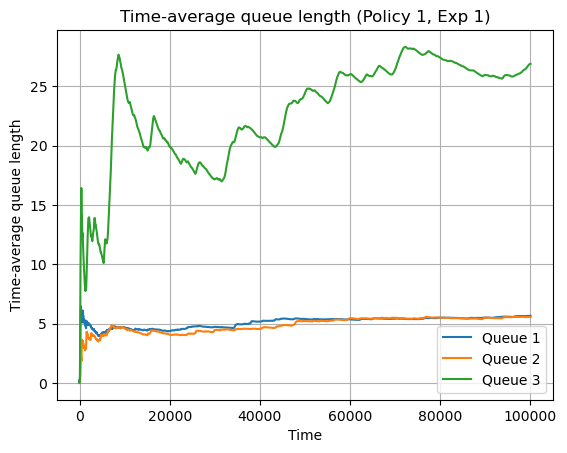

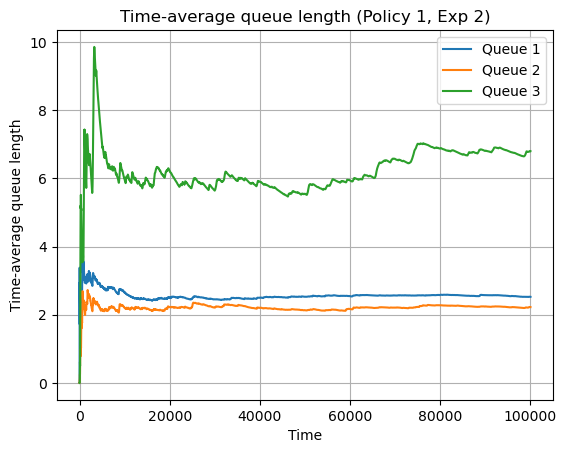

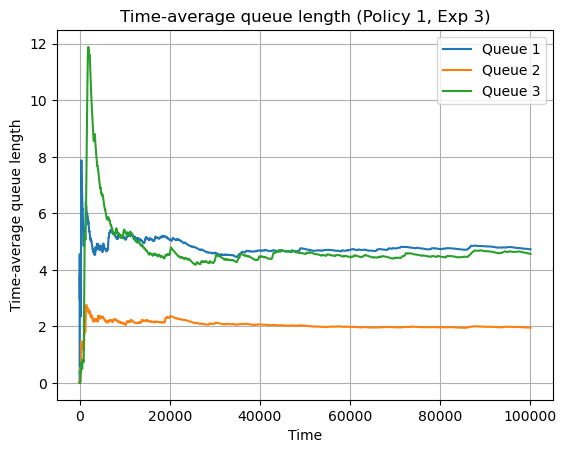

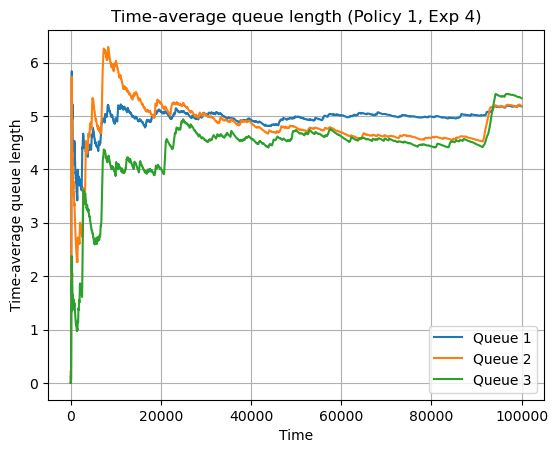

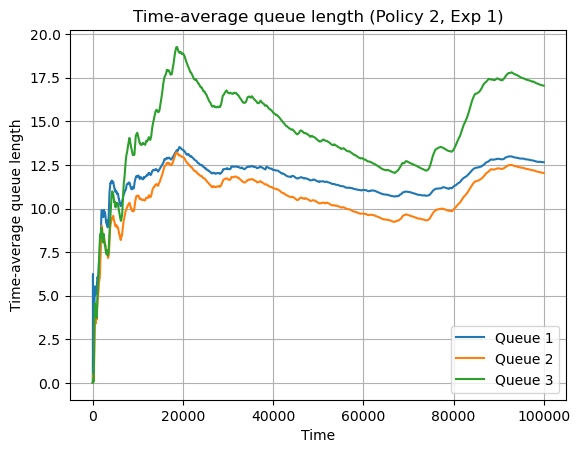

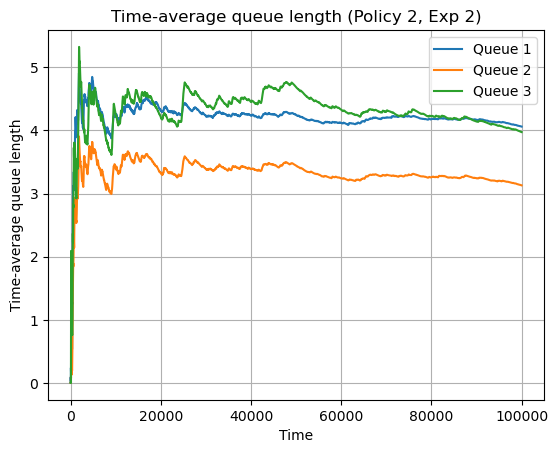

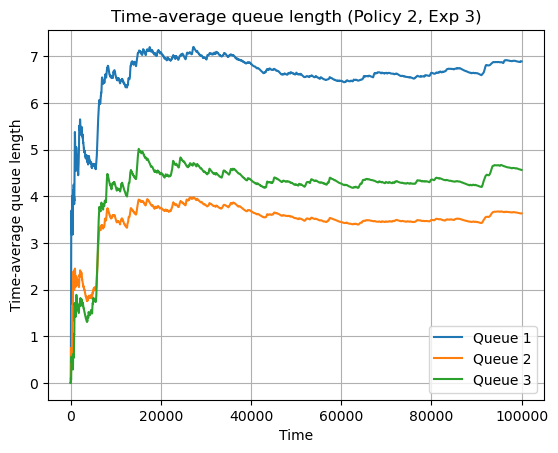

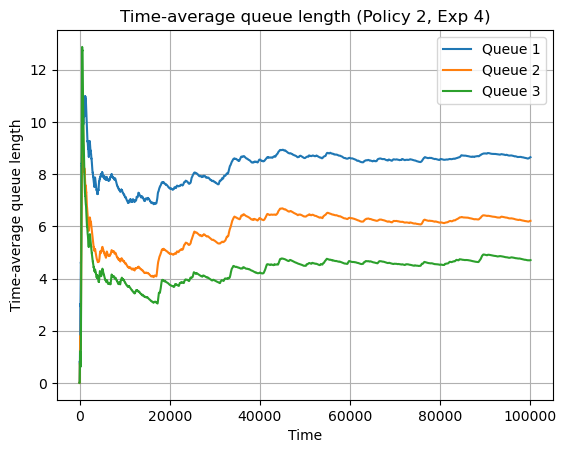

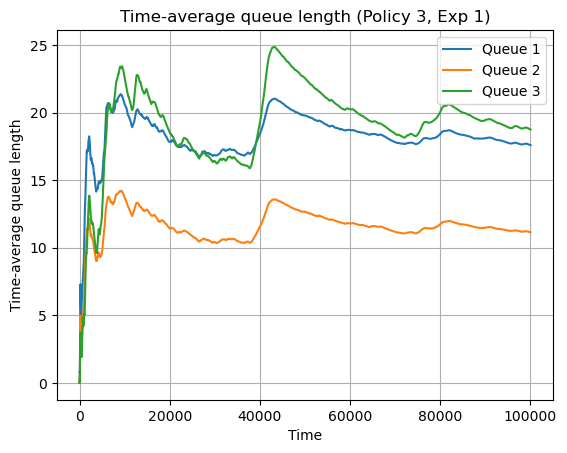

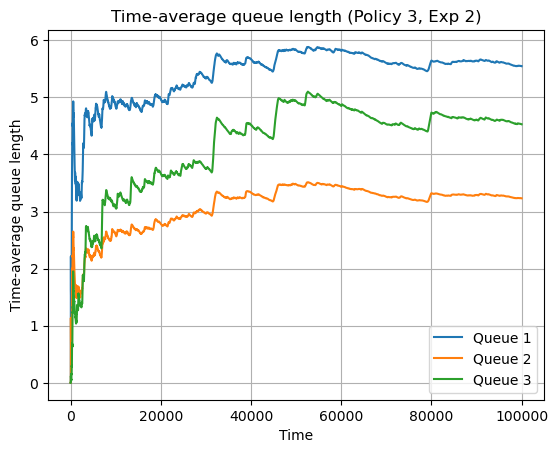

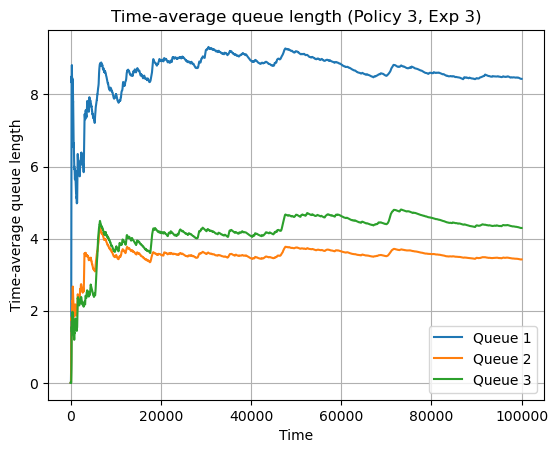

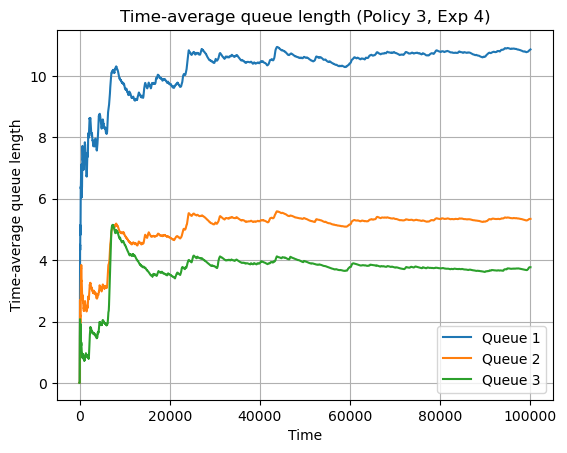

In [2]:
from utils import plot_time_avg_queue

for pol_idx, pol in enumerate(policies):
    for exp_idx, exp in enumerate(exp_num):
        log = queue_logs[pol_idx][exp_idx] 
        plot_time_avg_queue(log, warmup_time=0.0,
                            exp_num=exp, policy_num=pol)


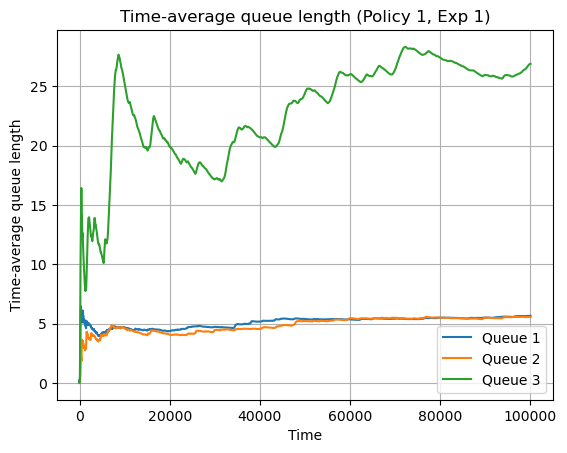

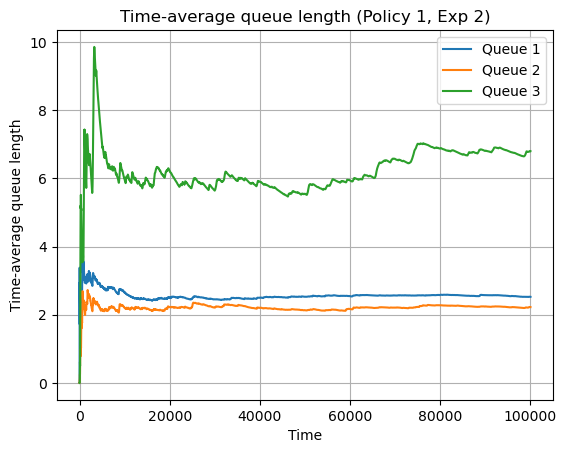

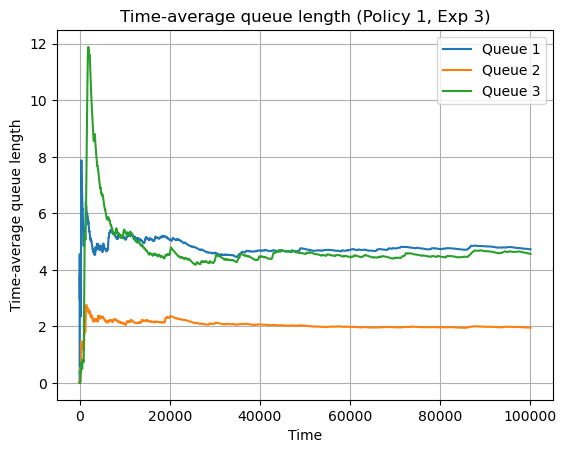

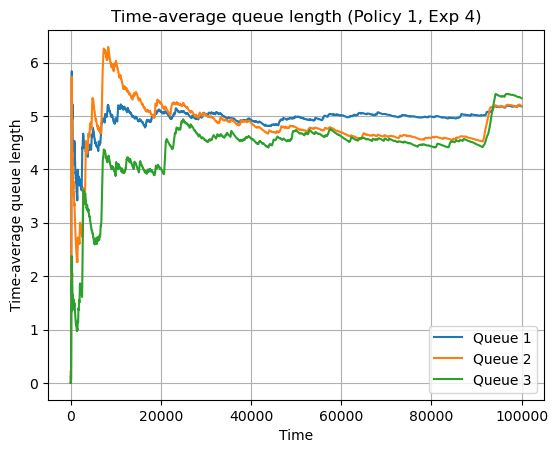

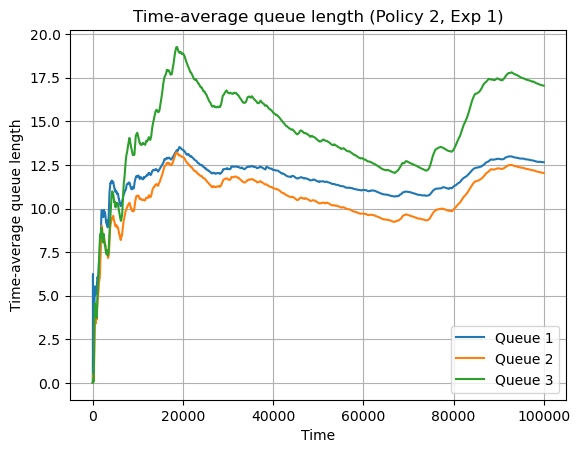

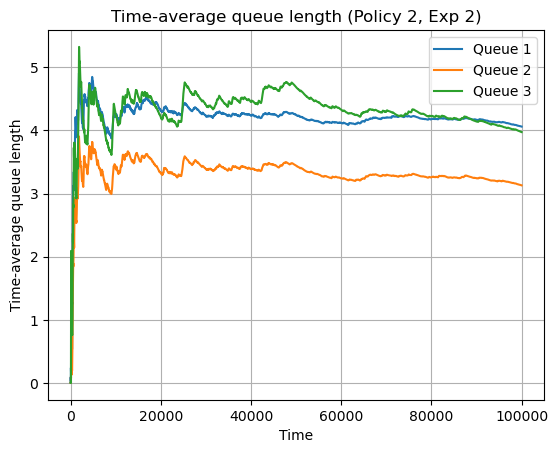

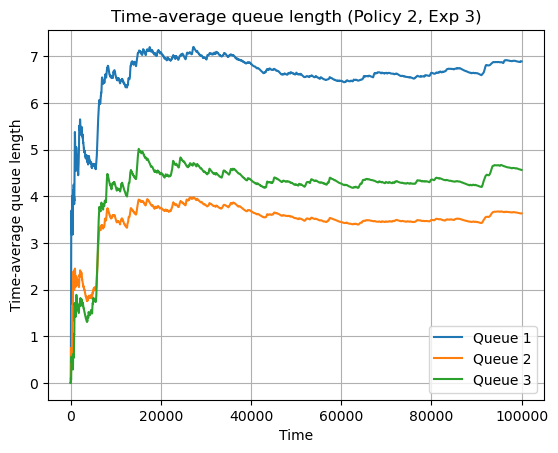

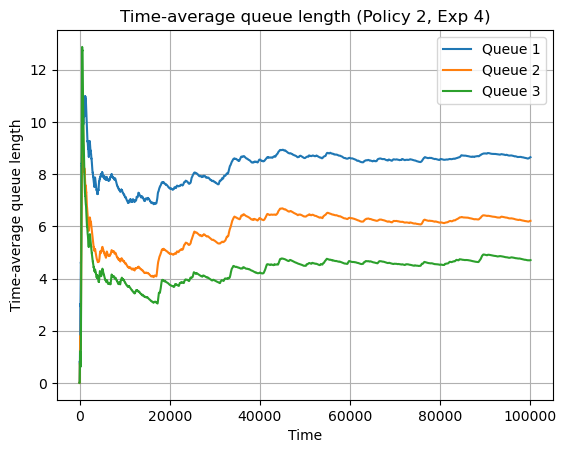

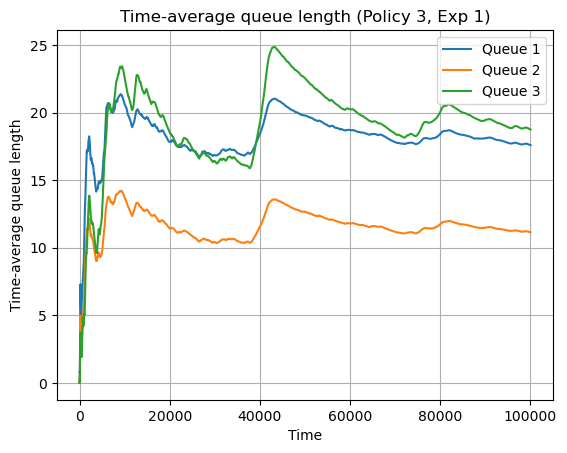

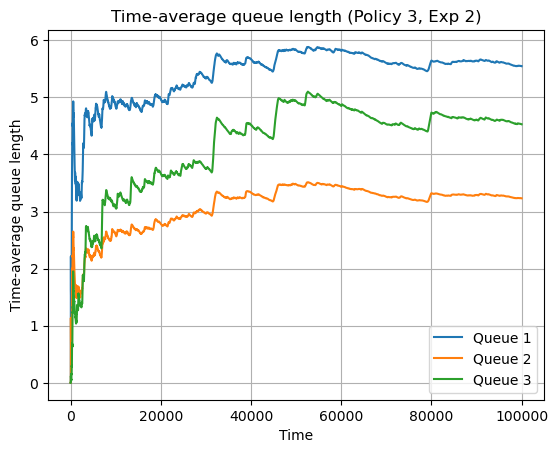

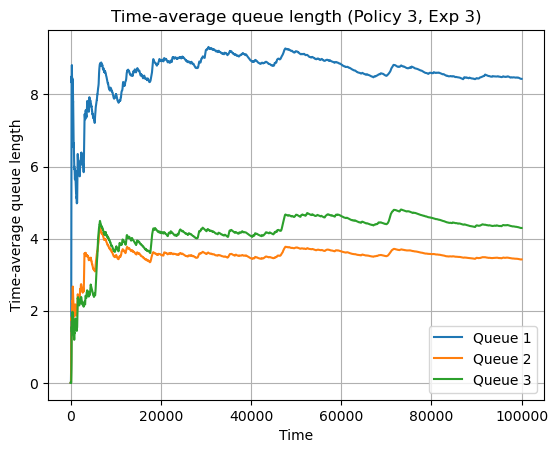

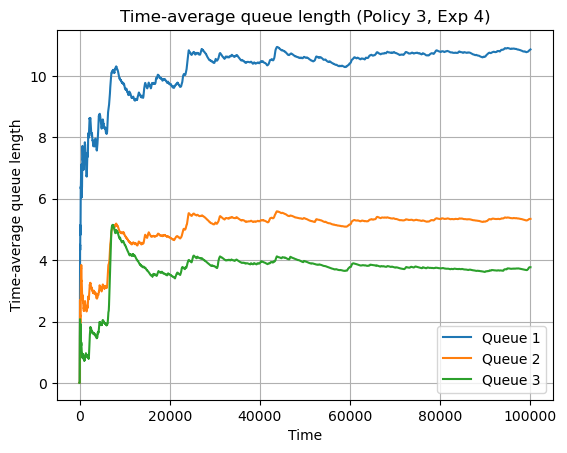

------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 35.02346346032603
Fraction of customers waiting over 30s: [0.8909166809385168, 0.9086528985348546, 0.9449534896674651]
ITERS: 459593
Average length of queue 1: 5.0092872067736
Average num waited over 30s in queue 1: 83233
Average length of queue 2: 5.093528514073134
Average num waited over 30s in queue 2: 41490
Average length of queue 3: 30.78571729318942
Average num waited over 30s in queue 3: 67859
------------------- Policy 1, Results for experiment 1:----------------
Average profit per customer: 28.139626787593723
Fraction of customers waiting over 30s: [0.8944949281487743, 0.9146058563487548, 0.9463615534908565]
ITERS: 461157
Average length of queue 1: 5.313628905480868
Average num waited over 30s in queue 1: 84655
Average length of queue 2: 5.58838439870014
Average num waited over 30s in queue 2: 41792
Average length of queue 3: 44.30762198808516
Average num waited over 30s in que

In [3]:
from policies import run_experiment
import numpy as np
from utils import plot_time_avg_queue

policies   = [1, 2, 3] 
experiments = [1, 2, 3, 4]
run_time = 100_000
n_reps = 50

results = {}


for pol_idx, pol in enumerate(policies):
    for exp_idx, exp in enumerate(exp_num):
        log = queue_logs[pol_idx][exp_idx] 
        plot_time_avg_queue(log, warmup_time=0.0,
                            exp_num=exp, policy_num=pol)


for pol in policies:
    results[pol] = {}
    for exp in experiments:
        queue_logs = []
        profits = []
        fracs_over30 = []
        avg_queues = []

        for r in range(n_reps):
            qlog, profit_per_customer, frac_over_30s, avg_queue_len = run_experiment(
                pol, exp, run_time, 4000
            )
            queue_logs.append(qlog)
            profits.append(profit_per_customer)
            fracs_over30.append(frac_over_30s)
            avg_queues.append(avg_queue_len) 

        results[pol][exp] = {
            "queue_logs": queue_logs,
            "profits": np.array(profits),
            "frac_over_30s": np.array(fracs_over30),
            "avg_queues": np.array(avg_queues), 
        }


In [19]:
from utils import ci_1d

alpha = 0.05 

print("hi")
for pol in policies:
    for exp in experiments:
        res = results[pol][exp]
        profits = res["profits"]
        fracs_over30 = res["frac_over_30s"]
        avg_queues = res["avg_queues"]

        ci_profit = ci_1d(profits, alpha=alpha)
        ci_frac_q1 = ci_1d(fracs_over30[:, 0], alpha=alpha)
        ci_frac_q2 = ci_1d(fracs_over30[:, 1], alpha=alpha)
        ci_frac_q3 = ci_1d(fracs_over30[:, 2], alpha=alpha)
        ci_q1 = ci_1d(avg_queues[:, 0], alpha=alpha)
        ci_q2 = ci_1d(avg_queues[:, 1], alpha=alpha)
        ci_q3 = ci_1d(avg_queues[:, 2], alpha=alpha)

        print(f"\nPolicy {pol}, Experiment {exp}")
        print(f"  Profit per customer:      mean={ci_profit['mean']:.3f}, "
              f"CI={ci_profit['ci']}, rel_hw={ci_profit['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 1:       mean={ci_frac_q1['mean']:.3f}, "
              f"CI={ci_frac_q1['ci']}, rel_hw={ci_frac_q1['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 2:       mean={ci_frac_q2['mean']:.3f}, "
              f"CI={ci_frac_q2['ci']}, rel_hw={ci_frac_q2['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 3:       mean={ci_frac_q3['mean']:.3f}, "
              f"CI={ci_frac_q3['ci']}, rel_hw={ci_frac_q3['rel_halfwidth']:.3%}")
        print(f"  Avg queue 1 length:                   mean={ci_q1['mean']:.3f}, "
              f"CI={ci_q1['ci']}, rel_hw={ci_q1['rel_halfwidth']:.3%}")
        print(f"  Avg queue 2 length:                   mean={ci_q2['mean']:.3f}, "
              f"CI={ci_q2['ci']}, rel_hw={ci_q2['rel_halfwidth']:.3%}")
        print(f"  Avg queue 3 length:                   mean={ci_q3['mean']:.3f}, "
              f"CI={ci_q3['ci']}, rel_hw={ci_q3['rel_halfwidth']:.3%}")


hi

Policy 1, Experiment 1
  Profit per customer:      mean=31.991, CI=(30.741196127587955, 33.24170266212308), rel_hw=3.908%
  Fraction wait >30s for queue 1:       mean=0.897, CI=(0.896106926477875, 0.8974244701979176), rel_hw=0.073%
  Fraction wait >30s for queue 2:       mean=0.917, CI=(0.9156628815174851, 0.9173502382827429), rel_hw=0.092%
  Fraction wait >30s for queue 3:       mean=0.950, CI=(0.9488768949258826, 0.9511757777099619), rel_hw=0.121%
  Avg queue 1 length:                   mean=5.346, CI=(5.290462432467266, 5.401750598280498), rel_hw=1.041%
  Avg queue 2 length:                   mean=5.493, CI=(5.406782327936, 5.579643582575191), rel_hw=1.573%
  Avg queue 3 length:                   mean=35.717, CI=(33.06431736345717, 38.369444659542744), rel_hw=7.427%

Policy 1, Experiment 2
  Profit per customer:      mean=52.846, CI=(52.720780184695585, 52.97054690187727), rel_hw=0.236%
  Fraction wait >30s for queue 1:       mean=0.831, CI=(0.8300754648745149, 0.83215137409899)

In [18]:
from utils import ci_1d

alpha = 0.05 

print("hi")
for pol in policies:
    for exp in experiments:
        res = results[pol][exp]
        profits = res["profits"]
        fracs_over30 = res["frac_over_30s"]
        avg_queues = res["avg_queues"]

        ci_profit = ci_1d(profits, alpha=alpha)
        ci_frac_q1 = ci_1d(fracs_over30[:, 0], alpha=alpha)
        ci_frac_q2 = ci_1d(fracs_over30[:, 1], alpha=alpha)
        ci_frac_q3 = ci_1d(fracs_over30[:, 2], alpha=alpha)
        ci_q1 = ci_1d(avg_queues[:, 0], alpha=alpha)
        ci_q2 = ci_1d(avg_queues[:, 1], alpha=alpha)
        ci_q3 = ci_1d(avg_queues[:, 2], alpha=alpha)

        print(f"\nPolicy {pol}, Experiment {exp}")
        print(f"  Profit per customer:      mean={ci_profit['mean']:.3f}, "
              f"CI={ci_profit['ci']}, rel_hw={ci_profit['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 1:       mean={ci_frac_q1['mean']:.3f}, "
              f"CI={ci_frac_q1['ci']}, rel_hw={ci_frac_q1['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 2:       mean={ci_frac_q2['mean']:.3f}, "
              f"CI={ci_frac_q2['ci']}, rel_hw={ci_frac_q2['rel_halfwidth']:.3%}")
        print(f"  Fraction wait >30s for queue 3:       mean={ci_frac_q3['mean']:.3f}, "
              f"CI={ci_frac_q3['ci']}, rel_hw={ci_frac_q3['rel_halfwidth']:.3%}")
        print(f"  Avg queue 1 length:                   mean={ci_q1['mean']:.3f}, "
              f"CI={ci_q1['ci']}, rel_hw={ci_q1['rel_halfwidth']:.3%}")
        print(f"  Avg queue 2 length:                   mean={ci_q2['mean']:.3f}, "
              f"CI={ci_q2['ci']}, rel_hw={ci_q2['rel_halfwidth']:.3%}")
        print(f"  Avg queue 3 length:                   mean={ci_q3['mean']:.3f}, "
              f"CI={ci_q3['ci']}, rel_hw={ci_q3['rel_halfwidth']:.3%}")


hi

Policy 1, Experiment 1
  Profit per customer:      mean=31.991, CI=(30.741196127587955, 33.24170266212308), rel_hw=3.908%
  Fraction wait >30s for queue 1:       mean=0.897, CI=(0.896106926477875, 0.8974244701979176), rel_hw=0.073%
  Fraction wait >30s for queue 2:       mean=0.917, CI=(0.9156628815174851, 0.9173502382827429), rel_hw=0.092%
  Fraction wait >30s for queue 3:       mean=0.950, CI=(0.9488768949258826, 0.9511757777099619), rel_hw=0.121%
  Avg queue 1 length:                   mean=5.346, CI=(5.290462432467266, 5.401750598280498), rel_hw=1.041%
  Avg queue 2 length:                   mean=5.493, CI=(5.406782327936, 5.579643582575191), rel_hw=1.573%
  Avg queue 3 length:                   mean=35.717, CI=(33.06431736345717, 38.369444659542744), rel_hw=7.427%

Policy 1, Experiment 2
  Profit per customer:      mean=52.846, CI=(52.720780184695585, 52.97054690187727), rel_hw=0.236%
  Fraction wait >30s for queue 1:       mean=0.831, CI=(0.8300754648745149, 0.83215137409899)